# Controlled Gates
$$\newcommand{\ket}[1]{|#1\rangle}$$
$$\newcommand{\bra}[1]{\langle#1|}$$
### It is a conditional gate that performs an operation or gate on the target qubit if the control qubit is $\ket{1}$

## CNOT Gate

### It is a conditional gate that performs X gate on the target qubit if the control qubit is $\ket{1}$

$$Truth \space Table$$
$$where \space c = control \space qubit, t = target \space qubit$$
| Input $\ket{ct}$ | Output $\ket{ct}$ |
| :-: | :-: |
| $\ket{00}$ | $\ket{00}$ |
| $\ket{01}$ | $\ket{01}$ |
| $\ket{10}$ | $\ket{11}$ |
| $\ket{11}$ | $\ket{10}$ |

When c = 1, t flips

<center><b>$$CNOT \,Gate=\begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\0 & 0 & 0 & 1\\0 & 0 & 1 & 0\end{bmatrix} $$</b></center>
<br>
<br>
<left><b>It can be represented in terms of tensor product like 
so<b><left>
<br><br>
<center><b>$$CNOT \,Gate=\begin{bmatrix} 1 & 0 \\ 0 & 0\end{bmatrix}\otimes 
\begin{bmatrix} 1 & 0 \\ 0 & 1\end{bmatrix} + \begin{bmatrix} 0 & 0 \\ 0 & 1\end{bmatrix}\otimes 
\begin{bmatrix} 0 & 1 \\ 1 & 0\end{bmatrix}$$</b></center>
<br>
<center><b>$$CNOT \,Gate=\ket{0}\bra{0} \otimes \, I \, + \ket{1}\bra{1} \, \otimes \, X$$</b></center>
<br>
<center><b>$$CNOT \,Gate=\begin{bmatrix} I & 0 \\ 0 & X\end{bmatrix} $$</b></center>
<br>

In [1]:
# importing dependencies
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit import BasicAer
from qiskit import execute, visualization
from qiskit.quantum_info import Operator
import matplotlib.pyplot as plt
import numpy as np



Applying CNOT on 00


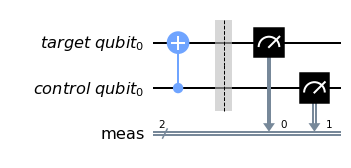

{'00': 1024}


Applying CNOT on 01


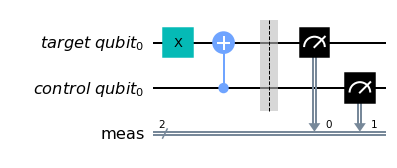

{'01': 1024}


Applying CNOT on 10


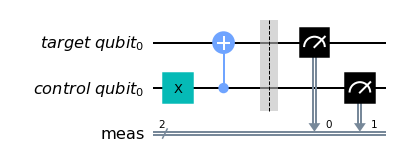

{'11': 1024}


Applying CNOT on 11


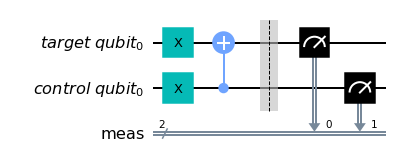

{'10': 1024}


In [2]:
def applying_cnot(q0, q1):
    """
    A quantum circuit that applies CNOT gate
    00 => 00
    01 => 01
    10 => 11
    11 => 10
    """
    print("\n\nApplying CNOT on {}{}".format(q1, q0))
    q_c = QuantumRegister(1, 'control qubit')
    q_t = QuantumRegister(1, 'target qubit')
    qc = QuantumCircuit(q_t, q_c)
    # apply x gate if q0=1, as by deafult qubits are intialised as |0> in qiskit
    if q0:
        qc.x(0)
    # apply x gate if q1=1, as by deafult qubits are intialised as |0> in qiskit
    if q1:
        qc.x(1)
    # applying the cnot gate
    # q1 is control qubit
    # q0 is target qubit
    qc.cx(1, 0)
    qc.measure_all()
    display(qc.draw(output="mpl"))
    
    backend = BasicAer.get_backend('qasm_simulator')
    job = execute(qc, backend)
    result = job.result()
    
    counts = result.get_counts(qc)
    print(counts)
    
applying_cnot(0,0)
applying_cnot(1,0)
applying_cnot(0,1)
applying_cnot(1,1)

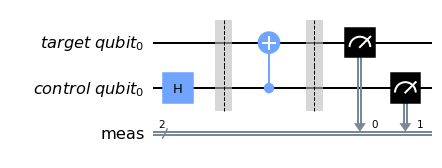

{'11': 514, '00': 510}


In [3]:
q_c = QuantumRegister(1, 'control qubit')
q_t = QuantumRegister(1, 'target qubit')
qc = QuantumCircuit(q_t, q_c)

qc.h(1)
qc.barrier()
# applying the cnot gate
# q1 is control qubit
# q0 is target qubit
qc.cx(1, 0)
qc.measure_all()
display(qc.draw(output="mpl"))
    
backend = BasicAer.get_backend('qasm_simulator')
job = execute(qc, backend)
result = job.result()
    
counts = result.get_counts(qc)
print(counts)

<left><b>We know </b></left>
<left><b>the initial state is $\ket{00}$ </b></left>
<center><b>$$  \ket{00}=\ket{0}\otimes\ket{0} $$</b></center>
<center><b>$$ (where  \otimes represent \, tensor\space product )$$</b></center>
<br>
<center><b>$$ \ket{00}=\ket{0} \otimes \ket{0} $$</b></center>
<br>
<center><b>$$\ket{00} =\begin{bmatrix} 1 \\ 0\end{bmatrix} \otimes \begin{bmatrix} 1 \\ 0\end{bmatrix}$$</b></center>
<br>
<center><b>$$\ket{00} =\begin{bmatrix} 1\\0\\0\\0\end{bmatrix} $$</b></center>
<br>
<left><b>H $\otimes$ I is applied on initial state </b></left>
$$H \otimes I = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1\end{bmatrix}\otimes\begin{bmatrix} 1 & 0 \\ 0 & -1\end{bmatrix}$$

$$H \otimes I = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 0 & 1 & 0 \\ 0 & 1 & 0 & 1 \\1 & 0 & -1 & 0\\0 & 1 & 0 & -1\end{bmatrix} $$
<br>

$$H \otimes I \ket{00} = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 0 & 1 & 0 \\ 0 & 1 & 0 & 1 \\1 & 0 & -1 & 0\\0 & 1 & 0 & -1\end{bmatrix}\begin{bmatrix} 1\\0\\0\\0\end{bmatrix}$$
<br>

<center><b>$$H \otimes I \ket{00} = \frac{1}{\sqrt{2}}\begin{bmatrix} 1\\0\\1\\0\end{bmatrix} $$</b></center>
<br>
<left><b>Now applying CNOT </b></left>
<br>
$$CNOT(H \otimes I \ket{00}) = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\0 & 0 & 0 & 1\\0 & 0 & 1 & 0\end{bmatrix} \begin{bmatrix} 1\\0\\1\\0\end{bmatrix}$$
<br>
$$CNOT(H \otimes I \ket{00}) = \frac{1}{\sqrt{2}}\begin{bmatrix} 1\\0\\0\\1\end{bmatrix}$$
<br>
<left><b>Therefore, the result from simulation matches with the theoretic result</b></left>

## Phase Kickback

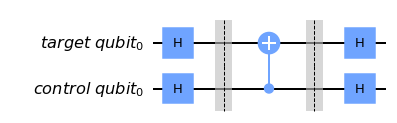

In [4]:
q_c = QuantumRegister(1, 'control qubit')
q_t = QuantumRegister(1, 'target qubit')
qc = QuantumCircuit(q_t, q_c)

qc.h([0, 1])
qc.barrier()

# applying the cnot gate
# q1 is control qubit
# q0 is target qubit
qc.cx(1, 0)

qc.barrier()
qc.h([0, 1])

display(qc.draw(output="mpl"))

gate1 = Operator(qc)

| Input $\ket{ct}$ | Output $\ket{ct}$ |
| :-: | :-: |
| $\ket{00}$ | $\ket{00}$ |
| $\ket{01}$ | $\ket{11}$ |
| $\ket{10}$ | $\ket{10}$ |
| $\ket{11}$ | $\ket{01}$ |

Target qubit starts behaving like control and 

Control qubit starts behaving like target qubit

The above circuit is equivalent to the below circuit

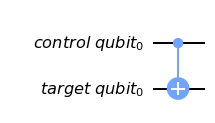

In [5]:
q_c = QuantumRegister(1, 'control qubit')
q_t = QuantumRegister(1, 'target qubit')
qc = QuantumCircuit(q_c, q_t)

# applying the cnot gate
# q0 is control qubit
# q1 is target qubit
qc.cx(0, 1)

display(qc.draw(output="mpl"))

gate2 = Operator(qc)

There equivalence can be verified by fidelity

In [6]:
from qiskit.quantum_info import average_gate_fidelity, process_fidelity
print('Average Gate Fidelity: {}'.format(average_gate_fidelity(gate1, gate2)))
print('Process Fidelity: {}'.format(process_fidelity(gate1, gate2)))

Average Gate Fidelity: 0.9999999999999994
Process Fidelity: 0.9999999999999993


### Phase Kickback occurs when a gate on a qubit is 'kicked back' into another qubit via a controlled operation.
### As seen above, X gate operation on the target qubit is kicked back on the control qubit.
### Advantage: allows CNOT in both directions ( By wrapping CNOT with Hadamard gates

## NOTE

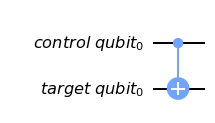

In [7]:
display(qc.draw(output="mpl"))

Theoretically the matrix for this operation is

<center><b>$$CNOT \,Gate=\begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\0 & 0 & 0 & 1\\0 & 0 & 1 & 0\end{bmatrix} $$</b></center>

But in qiskit the ordering of the qubits is reversed, where the first qubit is the Least Significant Bit (LSB), so accordingly the above gate is represented by the matrix

<center><b>$$CNOT \,Gate=\begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 1 \\0 & 0 & 1 & 0\\0 & 1 & 0 & 0\end{bmatrix} $$</b></center>


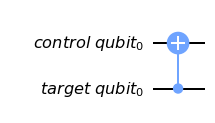

In [8]:
q_c = QuantumRegister(1, 'control qubit')
q_t = QuantumRegister(1, 'target qubit')
qc = QuantumCircuit(q_c, q_t)
qc.cx(1, 0)
display(qc.draw(output="mpl"))

Theoretically the matrix for this operation is

<center><b>$$CNOT \,Gate=\begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 1 \\0 & 0 & 1 & 0\\0 & 1 & 0 & 0\end{bmatrix} $$</b></center>

But in qiskit the ordering of the qubits is reversed, where the first qubit is the Least Significant Bit (LSB), so accordingly the above gate is represented by the matrix


<center><b>$$CNOT \,Gate=\begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\0 & 0 & 0 & 1\\0 & 0 & 1 & 0\end{bmatrix} $$</b></center>

This is opposite of the one before this

# Other Controlled Gates

### From [universality and fidelity notebook](https://github.com/developer-student-club-thapar/Quantum-Computing/blob/main/3.%20Single%20Qubit%20Gates/universality_and_fidelity.ipynb) we know that
Y = SXS'

Z = HXH
### So their controlled version will be
CY = S(CX)S'

CZ = H(CX)H

### Generalising for every gate U
<center><b>$$CU \,Gate=\begin{bmatrix} I & 0 \\ 0 & U\end{bmatrix} $$</b></center>